In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float),
              ])

In [5]:
data = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE.csv', dtype=dt))

# ais sign correction
#data.loc[data.method == 6,('ais_50')] = 1-data[data.method == 6].ais_50
#data.loc[data.method == 1,('white_box_50')] = 1-data[data.method == 1].white_box_50

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

white_box = data[data.method == 1]
pca = data[data.method == 2]
hog = data[data.method == 3]
pca_cat = data[data.method == 4]
hog_cat = data[data.method == 5]
ais = data[data.method == 6]
rec_attack = data[data.method == 42]


# AIS

In [3]:
print(ais.mem_inf_adv_ais.mean())
print(ais.set_accuracy_ais.mean())

0.002564102564102578
0.5128205128205128


## Reconstruction Attack

In [8]:
print(rec_attack.mc_attack_eps_50.mean())
print(rec_attack.set_accuracy_mc_ones.mean())

0.5688
0.985


# White Box

In [9]:
len(white_box)

0

In [10]:
print(white_box.mem_inf_adv_wb.mean())
print(white_box.set_mem_inf_adv_wb.mean())
print(white_box.set_accuracy_wb.mean())

nan
nan
nan


# PCA per Category
0.1 mc_attack_log_50

In [11]:
pca_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50','set_accuracy_mc_log','set_accuracy_mc_ones']]*100

,mc_attack_log_50,mc_attack_eps_50,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,,,
-1.000,54.294118,54.294118,90.000000,90.000000
0.001,51.288889,50.866667,65.555556,60.000000
0.010,53.200000,53.177778,79.444444,81.111111
0.100,53.111111,52.822222,76.111111,72.777778
1.000,51.488889,51.222222,62.777778,61.666667


In [12]:
pca_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']]

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.000,85,85
0.001,90,90
0.010,90,90
0.100,90,90
1.000,90,90


In [13]:
pca_cat_opt_perc = pca_cat[pca_cat.percentile == -1]
print(len(pca_cat_opt_perc))

print(pca_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(pca_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(pca_cat_opt_perc.set_accuracy_mc_ones.mean())
print(pca_cat_opt_perc.set_accuracy_mc_log.mean())

#print(len(pca_opt_perc[pca_opt_perc.mc_attack_log_50>0.5])/len(pca_opt_perc))
#print(len(pca_opt_perc[pca_opt_perc.mc_attack_eps_50>0.5])/len(pca_opt_perc))

85
0.08588235294117649
0.08588235294117649
0.9
0.9


# Histogram of Gradients (HOG) per category
0.01 Epsilon Method?

In [14]:
hog_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50','set_accuracy_mc_log','set_accuracy_mc_ones']]*100

,mc_attack_log_50,mc_attack_eps_50,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,,,
-1.000,50.666667,50.666667,60.714286,60.714286
0.001,49.752809,50.516854,49.438202,55.617978
0.010,50.449438,50.123596,57.303371,53.370787
0.100,50.752809,50.651685,63.483146,61.235955
1.000,50.494382,50.460674,58.426966,60.674157


In [15]:
hog_cat_opt_perc = hog_cat[hog_cat.percentile == -1]

print(hog_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(hog_cat_opt_perc.set_mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.set_accuracy_mc_ones.mean())

0.013333333333333353
0.013333333333333353
0.21428571428571427
0.6071428571428571


In [16]:
def calc_error(data):
    return data.std()/np.sqrt(len(data))

[56.88  54.294 50.667]
[0.353 0.378 0.425]
[98.5   90.    60.714]
[0.857 2.994 5.086]


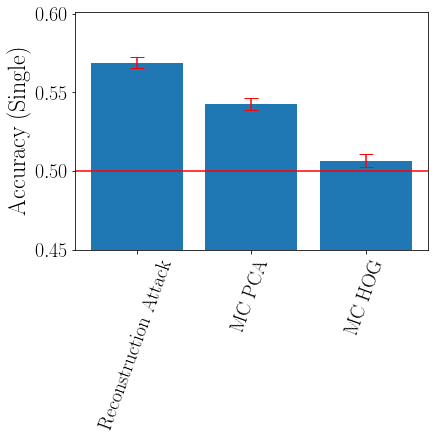

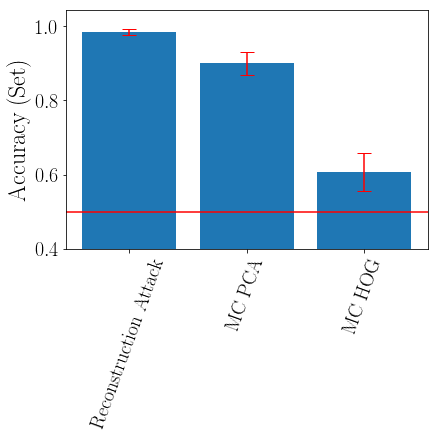

In [20]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['Reconstruction Attack','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

y = [#white_box.white_box_50.mean(), 
                               rec_attack.mc_attack_eps_50.mean(), 
                               #pca_opt_perc.mc_attack_log_50.mean(),
                               #pca_opt_perc.mc_attack_eps_50.mean(),
                               #hog_opt_perc.mc_attack_log_50.mean(),
                               #hog_opt_perc.mc_attack_eps_50.mean(),
                               pca_cat_opt_perc.mc_attack_log_50.mean(),
                               #pca_cat_opt_perc.mc_attack_eps_50.mean(),
                               hog_cat_opt_perc.mc_attack_log_50.mean()]
                               #hog_cat_opt_perc.mc_attack_eps_50.mean()]
    
print(np.round(100*np.array(y),3))

rects1 = ax.bar(ind,  y)

e = [#calc_error(white_box.white_box_50), 
                               calc_error(rec_attack.mc_attack_eps_50), 
                               #calc_error(pca_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_opt_perc.mc_attack_log_50), 
                               #calc_error(hog_opt_perc.mc_attack_eps_50),
                               calc_error(pca_cat_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_cat_opt_perc.mc_attack_eps_50), 
                               calc_error(hog_cat_opt_perc.mc_attack_log_50)] 
                               #calc_error(hog_cat_opt_perc.mc_attack_eps_50)]

print(np.round(100*np.array(e),3))
    
np.save('y_single_cvae',y)
np.save('e_single_cvae',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)


plt.ylim(ymin=0.45)
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylabel('Accuracy (Single)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

ind = np.arange(N)

y = [#white_box.set_accuracy_wb.mean(), 
                               rec_attack.set_accuracy_mc_ones.mean(), 
                               #pca_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_opt_perc.set_accuracy_mc_log.mean(),
                               #hog_opt_perc.set_accuracy_mc_ones.mean(),
                               pca_cat_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_cat_opt_perc.set_accuracy_mc_ones.mean(),
                               hog_cat_opt_perc.set_accuracy_mc_log.mean()]
                               #hog_cat_opt_perc.set_accuracy_mc_ones.mean()]
    
print(np.round(100*np.array(y),3))
rects1 = ax.bar(ind, y)

e = [#calc_error(white_box.set_accuracy_wb), 
                               calc_error(rec_attack.set_accuracy_mc_ones), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_log), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_ones),
                               calc_error(pca_cat_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_cat_opt_perc.set_accuracy_mc_ones), 
                               calc_error(hog_cat_opt_perc.set_accuracy_mc_log)]
                               #calc_error(hog_cat_opt_perc.set_accuracy_mc_ones)]
    
print(np.round(100*np.array(e),3))

np.save('y_set_cvae',y)
np.save('e_set_cvae',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('Accuracy (Set)', fontsize='large')

plt.ylim(ymin=0.4)
plt.axhline(y=0.5, color='r', linestyle='-')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('GAN_MNIST_Mem_Inf_10_Perc.pgf', bbox_inches="tight")
    
plt.show()

In [13]:
print(len(pca_cat_opt_perc))
print(len(hog_cat_opt_perc))
print(len(ais))
print(len(white_box))

85
84
78
0
